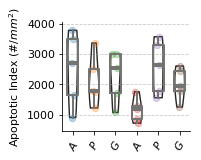

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import scipy.stats as st

BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

df = pd.read_excel('dcp_quantification_oe.xlsx',sheet_name = 'Sheet1')
a = data=df[["a_c"]].values
a = a[~np.isnan(a)].tolist()
b = data=df[["p_c"]].values
b = b[~np.isnan(b)].tolist()
c = data=df[["g_c"]].values
c = c[~np.isnan(c)].tolist()
d = data=df[["a_o"]].values
d = d[~np.isnan(d)].tolist()
e = data=df[["p_o"]].values
e = e[~np.isnan(e)].tolist()
f = data=df[["g_o"]].values
f = f[~np.isnan(f)].tolist()

POSITIONS = [0,1,2,3,4,5]
x_label = ('$A$', '$P$', '$G$', '$A$', '$P$', '$G$')
fig, ax = plt.subplots(figsize=(2.3, 2))
plt.rcParams.update({'font.size': 11})
y_data = [a, b, c, d, e, f]

violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    
medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, 
    showcaps = False,   
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)    

jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]
for x, y in zip(x_jittered, y_data):
    plt.scatter(x, y, s=40, alpha=0.3)

ax.set_xlabel('')
ax.set_ylabel(r'Apoptotic Index (#/$mm^{2}$)', fontsize = 11)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(x_label, rotation=60)

### PiezoOE

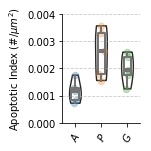

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import scipy.stats as st

BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

df = pd.read_excel('dcp_quantification_oe.xlsx',sheet_name = 'Sheet1')

d = data=df[["a_o"]].values
d = d[~np.isnan(d)].tolist()
e = data=df[["p_o"]].values
e = e[~np.isnan(e)].tolist()
f = data=df[["g_o"]].values
f = f[~np.isnan(f)].tolist()

d = [x*(10**-6) for x in d]
e = [x*(10**-6) for x in e]
f = [x*(10**-6) for x in f]

POSITIONS = [0,1,2]
x_label = ('$A$', '$P$', '$G$')
fig, ax = plt.subplots(figsize=(1.4, 2))
plt.rcParams.update({'font.size': 11})
y_data = [d, e, f]

violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    
medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, 
    showcaps = False,   
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)    

jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]
for x, y in zip(x_jittered, y_data):
    plt.scatter(x, y, s=40, alpha=0.3)

ax.set_xlabel('')
ax.set_ylabel(r'Apoptotic Index (#/$\mu m^{2}$)', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0,4000*(10**-6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(x_label, rotation=60)
#plt.savefig('Figure4K.svg', format='svg')

In [2]:
import pandas as pd
from scipy import stats
import numpy as np


table_data = {'Comparison': [], 'Mean Difference': [], 't-statistic': [], 'p-value': [], 'Effect Size': [], '95% CI Lower': [], '95% CI Upper': []}


comparisons = [('APc', a, b), ('AcAm', a, d), ('PcPm', b, e), ('APm',d,e), ('GcGm',c,f)]

for comparison, group1, group2 in comparisons:
    t_stat, p_value = stats.ttest_ind(group1, group2)
    mean_diff = round(abs(np.mean(group1) - np.mean(group2)), 2)
    effect_size = round(mean_diff / np.std(group1 + group2), 2)  
    ci = stats.t.interval(0.95, len(group1) + len(group2) - 2, loc=np.mean(group1) - np.mean(group2), scale=stats.sem(group1 + group2))
    table_data['Comparison'].append(comparison)
    table_data['Mean Difference'].append(mean_diff)
    table_data['t-statistic'].append(t_stat)
    table_data['p-value'].append(p_value)
    table_data['Effect Size'].append(effect_size)
    table_data['95% CI Lower'].append(round(ci[0], 2))
    table_data['95% CI Upper'].append(round(ci[1], 2))

result_table = pd.DataFrame(table_data)
print(result_table)

  Comparison  Mean Difference  t-statistic   p-value  Effect Size  \
0        APc           377.42     0.572144  0.582940         0.40   
1       AcAm          1343.46     2.337103  0.047631         1.27   
2       PcPm           442.45    -0.813189  0.439639         0.55   
3        APm          1408.49    -3.220111  0.012237         1.50   
4       GcGm           259.55     0.576761  0.579963         0.40   

   95% CI Lower  95% CI Upper  
0       -354.19       1109.04  
1        532.85       2154.07  
2      -1057.86        172.97  
3      -2128.99       -687.98  
4       -239.71        758.80  
